En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

In [6]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import kstest
from scipy.stats import skew


plt.rcParams["figure.figsize"] = (16,10) 

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("datos/cars_price1.csv", index_col = 0)
df.head(2)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
ID,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Black,8


El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
- Normalidad (ya la deberíais haber evaluado)


Test de normalidad visualmente

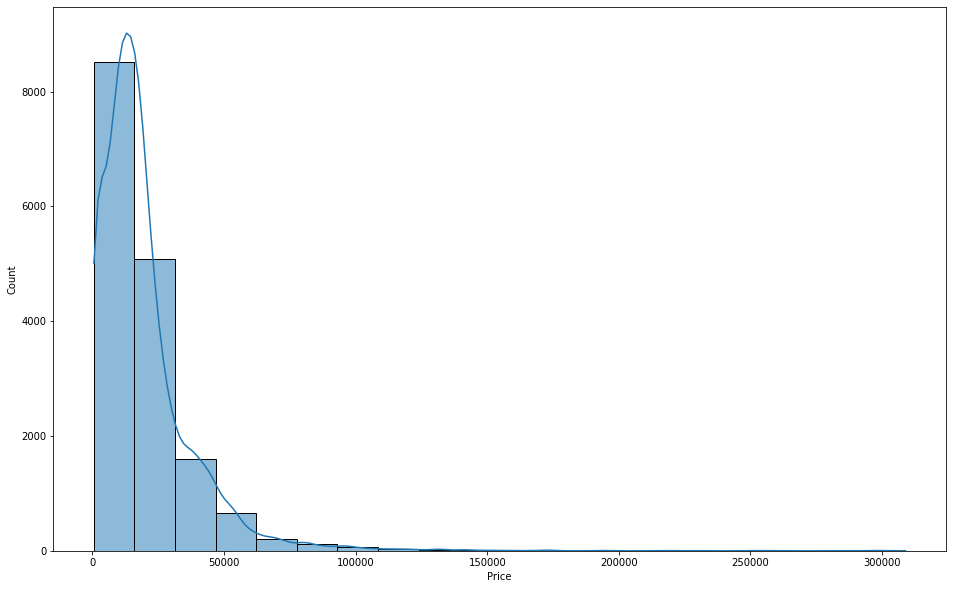

In [14]:
sns.histplot(df['Price'], kde = True, bins = 20);

Visualmente podemos observar que no tenemos una distribución normal en nuestra variable respuesta, que los datos están sesgados hacia la derecha y la gráfica no se parece a una campana de gauss.

In [9]:
kstest(df['Price'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Analíticamente el kstest nos demuestra que nuestro *p-valor* < 0.05, podemos rechazar la H0 por lo que los datos son no normales.

- Homogeneidad de varianzas


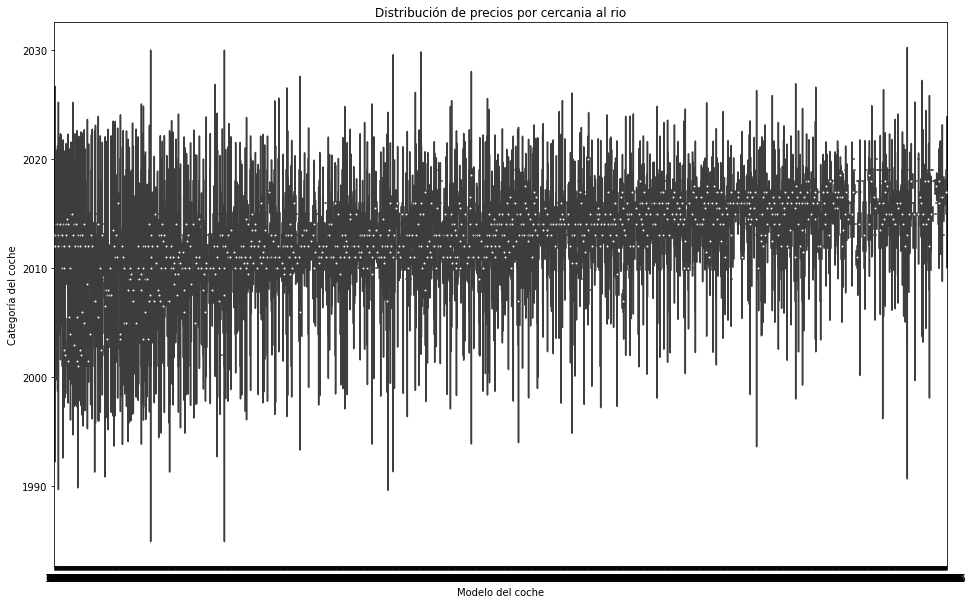

In [13]:
# violin plots

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))

sns.violinplot(
    x       = 'Price',
    y       = 'Prod. year',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por cercania al rio')
ax.set_ylabel('Categoría del coche')
ax.set_xlabel('Modelo del coche');

- Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica.